In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('McDonalds Menu.csv')  # read the data set

In [4]:
eatables = dataset[~dataset['Category'].isin(['Beverages', 'Coffee & Tea', 'Smoothies & Shakes'])]
eatables.sample(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
106,Desserts,Kids Ice Cream Cone,1 oz (29 g),45,10,1.5,2,1.0,4,0.0,...,7,2,0,0,6,1,2,0,4,0
70,Chicken & Fish,Premium McWrap Chicken & Bacon (Crispy Chicken),11.1 oz (316 g),630,280,32.0,49,9.0,45,0.5,...,56,19,3,13,7,32,60,20,20,20
23,Breakfast,"Sausage, Egg & Cheese McGriddles with Egg Whites",7.2 oz (205 g),500,230,26.0,40,10.0,52,0.0,...,46,15,2,9,15,21,2,0,20,10
91,Snacks & Sides,Chipotle BBQ Snack Wrap (Grilled Chicken),4.3 oz (123 g),260,70,8.0,13,3.5,18,0.0,...,30,10,1,6,7,16,4,2,10,10
16,Breakfast,Southern Style Chicken Biscuit (Regular Biscuit),5 oz (143 g),410,180,20.0,31,8.0,41,0.0,...,41,14,2,6,3,17,0,2,6,15


In [5]:
eatables['Serving Size'] = eatables['Serving Size'].str.split('(', expand=True)[1].str.split('g', expand=True)[0].astype(float)

C:\Users\Sohaib\AppData\Local\Temp/ipykernel_10888/1238714630.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eatables['Serving Size'] = eatables['Serving Size'].str.split('(', expand=True)[1].str.split('g', expand=True)[0].astype(float)


In [6]:
# add a new column for calorie density of each non-drink item
eatables['Calorie Density'] = eatables['Calories'] / eatables['Serving Size']

C:\Users\Sohaib\AppData\Local\Temp/ipykernel_10888/2028409427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eatables['Calorie Density'] = eatables['Calories'] / eatables['Serving Size']


In [10]:
most_calorie_dense = eatables.sort_values(by=["Category", 'Calorie Density'], ascending=[True, False]).groupby('Category')[["Item",  "Category","Calorie Density"]].head(3)
most_calorie_dense

,Item,Category,Calorie Density
53,Bacon McDouble,Beef & Pork,2.732919
55,Jalapeño Double,Beef & Pork,2.704403
50,Double Cheeseburger,Beef & Pork,2.670807
39,Cinnamon Melts,Breakfast,4.035088
10,Sausage Biscuit (Regular Biscuit),Breakfast,3.675214
11,Sausage Biscuit (Large Biscuit),Breakfast,3.664122
78,Chicken McNuggets (4 piece),Chicken & Fish,2.923077
81,Chicken McNuggets (20 piece),Chicken & Fish,2.910217
82,Chicken McNuggets (40 piece),Chicken & Fish,2.910217
104,Chocolate Chip Cookie,Desserts,4.848485


In [11]:
least_calorie_dense = eatables.sort_values(by=["Category", 'Calorie Density'], ascending=[True, True]).groupby('Category')[["Item",  "Category","Calorie Density"]].head(3)
least_calorie_dense 

,Item,Category,Calorie Density
46,Quarter Pounder Deluxe,Beef & Pork,2.213115
54,Daily Double,Beef & Pork,2.263158
56,McRib,Beef & Pork,2.403846
41,Fruit & Maple Oatmeal without Brown Sugar,Breakfast,1.035857
40,Fruit & Maple Oatmeal,Breakfast,1.155378
1,Egg White Delight,Breakfast,1.851852
77,Premium McWrap Chicken Sweet Chili (Grilled Ch...,Chicken & Fish,1.305842
73,Premium McWrap Chicken & Ranch (Grilled Chicken),Chicken & Fish,1.515152
71,Premium McWrap Chicken & Bacon (Grilled Chicken),Chicken & Fish,1.589404
106,Kids Ice Cream Cone,Desserts,1.551724


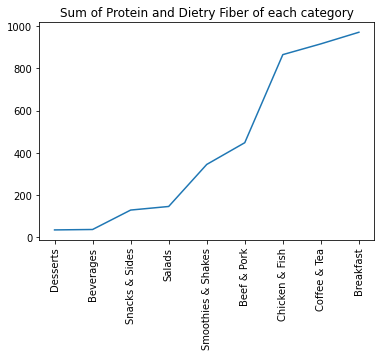

In [35]:
# boxplot of sum of Dietary Fiber and Protein
# plt.boxplot(dataset.groupby("Category")[["Dietary Fiber", "Protein"]].sum()[['Dietary Fiber', 'Protein']].sum(axis=1))
x = dataset.groupby("Category")[["Dietary Fiber", "Protein"]].sum().sum(axis=1)

# sort x in ascending order
x = x.sort_values(ascending=True)

# plot line chart
plt.plot(x)

# adjust the tick label font size
plt.xticks(rotation=90)

# add title
plt.title('Sum of Protein and Dietry Fiber of each category')

plt.show()

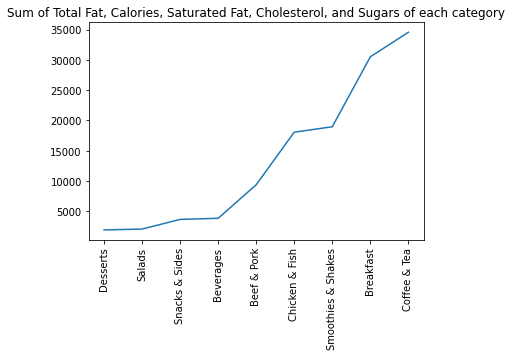

In [34]:
# boxplot of sum of Dietary Fiber and Protein
x = dataset.groupby("Category")[["Total Fat", "Calories", "Saturated Fat", "Cholesterol", "Sugars"]].sum().sum(axis=1)

# sort x in ascending order
x = x.sort_values(ascending=True)

# plot line chart
plt.plot(x)

# adjust the tick label font size
plt.xticks(rotation=90)

# add title
plt.title('Sum of Total Fat, Calories, Saturated Fat, Cholesterol, and Sugars of each category')

plt.show()